In [10]:
import os
import pandas as pd
import numpy as np
from zipfile import ZipFile

In [9]:
datafile = '../../data/raw/fashionmnist.zip'

In [44]:
with ZipFile(datafile) as zip:
    files = {zipped.filename: pd.read_csv(zip.open(zipped.filename)) 
             for zipped 
             in zip.filelist 
             if zipped.filename.endswith('.csv')}
    
test  = files['fashion-mnist_test.csv']
train = files['fashion-mnist_train.csv']    

# dic = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [50]:
from sklearn.linear_model import LogisticRegression

In [52]:
X = train.drop('label', axis = 1)
y = train.label

In [57]:
validation_X = test.drop('label', axis = 1)
validation_y = test.label

In [60]:
lr = LogisticRegression(max_iter = 500, n_jobs = 5).fit(X, y).predict(validation_X)

In [75]:
from sklearn.metrics import classification_report
print(classification_report(validation_y, lr))
result = validation_y.to_frame('actual').assign(predict = lr)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1000
           1       0.95      0.97      0.96      1000
           2       0.77      0.75      0.76      1000
           3       0.87      0.86      0.87      1000
           4       0.75      0.80      0.77      1000
           5       0.95      0.89      0.91      1000
           6       0.65      0.60      0.62      1000
           7       0.89      0.91      0.90      1000
           8       0.93      0.94      0.93      1000
           9       0.91      0.95      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



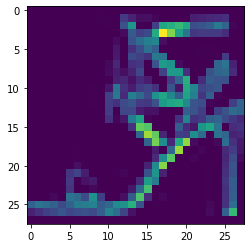

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline
error_sample = validation_X.iloc[result.where(lambda x: x['actual']!=x['predict']).dropna().index].sample()
plt.imshow(error_sample.values.reshape(28,28))


In [ ]:
result.loc[error_sample.index]